In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [163]:
from sklearn import datasets
from sklearn import metrics
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, learning_curve, KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer, r2_score, classification_report

<h2 style = "font-size:28px;font-family:Calibri"> Cross Validating Models </h2>

In [3]:
digits = datasets.load_digits()
features = digits.data
target = digits.target

# Create Standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Creating a pipeline that standardizes, then run logistic regression
pipeline = make_pipeline(standardizer, logit)

# Create K-fold cross-validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv = kf,
                            scoring = "accuracy",
                            n_jobs = -1)

cv_results

array([0.96111111, 0.96388889, 0.98050139, 0.97214485, 0.97214485])

In [4]:
cv_results.mean()

0.969958217270195

In [8]:
trainx, testx, trainy, testy = train_test_split(features, target, test_size = 0.15, random_state = 1)

In [9]:
standardizer.fit(trainx)

trainx_std = standardizer.transform(trainx)
testx_std = standardizer.transform(testx)

In [10]:
pipeline = make_pipeline(standardizer, logit)
cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv = kf,
                            scoring = 'accuracy',
                            n_jobs = -1)
cv_results

array([0.96111111, 0.96388889, 0.98050139, 0.97214485, 0.97214485])

<h2 style = "font-size:28px;font-family:Calibri">Creating a Baseline Regression Model</h2>

In [26]:
wine = datasets.load_wine()
features = wine.data
target = wine.target

trainx, testx, trainy, testy = train_test_split(features, target, random_state = 12)
print(f"Training Data:\n{trainx.shape}\n")
print(f"Testing Data:\n{testx.shape}")

Training Data:
(133, 13)

Testing Data:
(45, 13)


In [28]:
dummy = DummyRegressor(strategy = "mean")
dummy.fit(trainx, trainy)
dummy.score(testx, testy)

-0.03793911338525935

In [30]:
ols = LinearRegression()
ols.fit(trainx, trainy)
ols.score(testx, testy)

0.9018032167392446

In [32]:
# Create a dummy regressor that predicts 1's for everything
clf = DummyRegressor(strategy = "constant", constant = 1)
clf.fit(trainx, trainy)
clf.score(testx, testy)

-0.04976671850699854

<h2 style = "font-size:28px;font-family:Calibri">Creating a Baseline Classification Model</h2>

In [42]:
iris = datasets.load_iris()
features, target = iris.data, iris.target

trainx, testx, trainy, testy = train_test_split(features, target, random_state = 0)
dummy = DummyClassifier(strategy = "uniform", random_state = 15)
dummy.fit(trainx, trainy)
dummy.score(testx, testy)

0.39473684210526316

In [43]:
classifier = RandomForestClassifier()
classifier.fit(trainx, trainy)
classifier.score(testx, testy)

0.9736842105263158

<h2 style = "font-size:28px;font-family:Calibri">Evaluating Binary Classifier Predictions</h2>
Accuracy is a common performance metric. It is simply the proportion of
 observations predicted correctly

In [57]:
X, y = datasets.make_classification(n_samples = 10000,
                                   n_features = 8,
                                   n_informative = 8,
                                   n_redundant = 0,
                                   n_classes = 2,
                                   random_state = 12)

logit = LogisticRegression()
cross_val_score(logit, X, y, scoring = "accuracy")

array([0.858 , 0.852 , 0.8635, 0.8475, 0.845 ])

In [58]:
# Out of all the times the model said "Positive," 
# how many were actually correct?
cross_val_score(logit, X, y, scoring = "precision")

array([0.85871743, 0.85483871, 0.86619718, 0.84387352, 0.84241824])

In [59]:
# Out of all the actual "Positive" cases, how many did the model correctly identify?
cross_val_score(logit, X, y, scoring = "recall")

array([0.857     , 0.848     , 0.86013986, 0.85314685, 0.84915085])

In [60]:
# Trade off between precision and recall
cross_val_score(logit, X, y, scoring = "f1")

array([0.85785786, 0.85140562, 0.86315789, 0.84848485, 0.84577114])

In [61]:
trainx, testx, trainy, testy = train_test_split(X, y, random_state = 1, test_size = 0.1)
yhat = logit.fit(trainx, trainy).predict(testx)

In [62]:
metrics.accuracy_score(testy, yhat)

0.844

<h2 style = "font-size:28px;font-family:Calibri">Evaluating Binary Classifier Threshold</h2>
A receiver operating characteristic (ROC) curve is a graph that shows how a binary classifier model performs at different threshold values.

In [65]:
features, target = datasets.make_classification(n_samples = 10000,
                                      n_features = 10,
                                      n_classes = 2,
                                      n_informative = 3,
                                      random_state = 3)

trainx, testx, trainy, testy = train_test_split(features, target, test_size = 0.1, random_state = 12)
logit = LogisticRegression()
logit.fit(trainx, trainy)

LogisticRegression()

In [74]:
target_prob = logit.predict_proba(testx)[:,1]
target_prob[:10]

array([0.01252355, 0.0661181 , 0.90631248, 0.91567479, 0.68209849,
       0.68206113, 0.9764411 , 0.26695212, 0.85248808, 0.99312997])

In [76]:
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(testy, target_prob)

Text(0.5, 0, 'False Positive Rate')

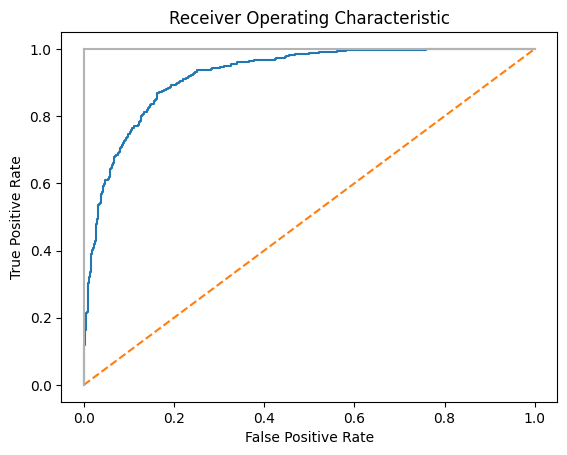

In [82]:
# Plot ROC curve
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls = "--")
plt.plot([0, 0], [1, 0], c = ".7")
plt.plot([1, 1], c = ".7")
plt.title("Receiver Operating Characteristic")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [88]:
logit.predict_proba(testx)[0:2]

array([[0.98747645, 0.01252355],
       [0.9338819 , 0.0661181 ]])

In [89]:
logit.classes_

array([0, 1])

The ROC curve represents the respective TPR and FPR for every
 probability threshold. For example, in our solution a threshold of roughly
 0.50 has a TPR of ~0.83 and an FPR of ~0.16

In [90]:
print("Threshold:", threshold[124])
print("True Positive Rate:", true_positive_rate[124])
print("False Positive Rate:", false_positive_rate[124])

Threshold: 0.5565105284130286
True Positive Rate: 0.8276553106212425
False Positive Rate: 0.1437125748502994


If we increase the threshold to ~80% (i.e., increase how certain the model has to be before it predicts an observation as positive) the TPR drops significantly but so does the FPR.

In [93]:
 print("Threshold:", threshold[49])
 print("True Positive Rate:", true_positive_rate[49])
 print("False Positive Rate:", false_positive_rate[49])

Threshold: 0.8043121870360497
True Positive Rate: 0.6092184368737475
False Positive Rate: 0.05189620758483034


In [94]:
metrics.roc_auc_score(testy, target_prob)

0.9228636914547658

<h1 style="font-size:28px;font-family:Calibri">
    Evaluating Multiclass Classifier Predictions
</h1>

In [98]:
features, target = datasets.make_classification(n_samples = 10000,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       random_state = 12345)

logit = LogisticRegression()
cross_val_score(logit, features, target, scoring = "accuracy")

array([0.7665, 0.767 , 0.757 , 0.7715, 0.742 ])

In [105]:
# macro: Calculate mean of metric scores for each class, weighting each class equally.
# weighted: Calculate mean of metric scores for each class, weighting each class 
# proportional to its size in the data.
# micro: Calculate mean of metric scores for each observation-class combination
cross_val_score(logit, features, target, scoring = "f1_macro")

array([0.69751075, 0.66813932, 0.68802855, 0.68079285, 0.68302795])

In [114]:
features = iris.data
target = iris.target
class_names = iris.target_names
trainx, testx, trainy, testy = train_test_split(features, target, random_state = 2)
logit = LogisticRegression()
yhat = logit.fit(trainx, trainy).predict(testx)
matrix = metrics.confusion_matrix(testy, yhat)
matrix

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]])

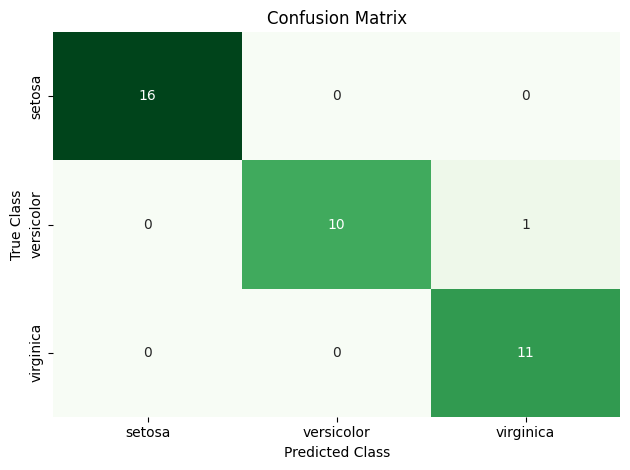

In [120]:
df = pd.DataFrame(matrix, index = class_names, columns = class_names)
sns.heatmap(df, annot = True, cbar = False, cmap = "Greens");
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.tight_layout()

<h1 style="font-size:28px;font-family:Calibri">
    Evaluating Regression Model
</h1>

In [123]:
features, target = datasets.make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)
ols = LinearRegression()
cross_val_score(ols, features, target, scoring = "neg_mean_squared_error")

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [124]:
# A common alternative regression evaluation metric is R2, which measures 
# the amount of variance in the target vector that is explained by the model
cross_val_score(ols, features, target, scoring = "r2")

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

<h1 style="font-size:28px;font-family:Calibri">
    Evaluating Clustering Model
</h1>
Use silhouette coefficients to measure the quality of the clusters (note that this does not measure predictive performance)

In [133]:
features, _ = datasets.make_blobs(n_samples = 1000,
                   n_features = 10,
                   centers = 3,
                   cluster_std = 0.5,
                   shuffle = True,
                   random_state = 1)

model = KMeans(n_clusters = 3, random_state = 1).fit(features)
target_predicted = model.labels_
target_predicted[:10]

array([0, 2, 0, 0, 0, 1, 1, 2, 0, 1], dtype=int32)

In [135]:
silhouette_score(features, target_predicted)

0.9012622257400308

In [138]:
features, target = datasets.make_regression(n_samples = 100,
                                   n_features = 3,
                                   random_state = 1)
trainx, testx, trainy, testy = train_test_split(features, target, test_size = 0.1)

In [142]:
def custom_metric(y, yhat):
    r2 = r2_score(y, yhat)
    return r2

score = make_scorer(custom_metric, greater_is_better = True)
classifier = Ridge()
model = classifier.fit(trainx, trainy)
score(model, testx, testy)

0.9996853217113003

In [144]:
metrics.r2_score(testy, model.predict(testx))

0.9996853217113003

<h1 style="font-size:28px;font-family:Calibri">
    Visualizing the Effect of Training Set
 Size
</h1>

In [149]:
digits = datasets.load_digits()
features, target = digits.data, digits.target
train_sizes, trainscores, testscores = learning_curve(
    RandomForestClassifier(),
    features, target,
    cv = 10,
    scoring = "accuracy",
    n_jobs = -1,
    train_sizes = np.linspace(0.01, 1.0, 50)
)

In [152]:
# Creating mean and std of training set scores
train_mean = np.mean(trainscores, axis = 1)
train_std = np.std(trainscores, axis = 1)

# Creating mean and std of testing set scores
test_mean = np.mean(testscores, axis = 1)
test_std = np.std(testscores, axis = 1)

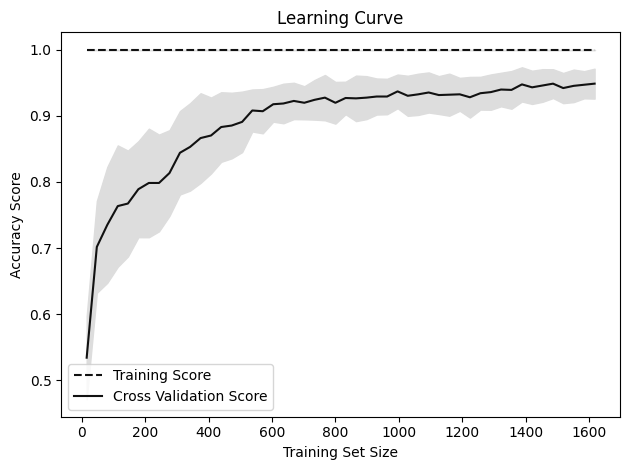

In [157]:
plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training Score")
plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross Validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()

<h1 style="font-size:28px;font-family:Calibri">
    Creating a Text Report of Evaluation
 Metrics
</h1>

In [159]:
features = iris.data
target = iris.target
class_names = iris.target_names

trainx, testx, trainy, testy = train_test_split(features, target)
classifier = LogisticRegression()
model = classifier.fit(trainx, trainy)
target_predicted = model.predict(testx)

In [160]:
print(classification_report(testy, target_predicted, target_names = class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



<h1 style="font-size:28px;font-family:Calibri">
    Visualizing the Effect of
 Hyperparameter Values
</h1>

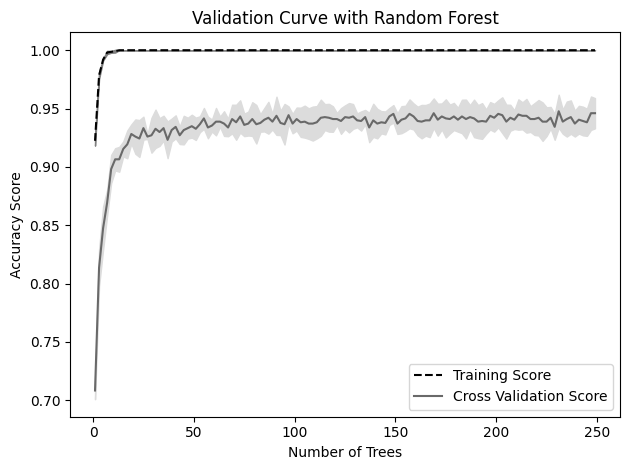

In [167]:
digits = datasets.load_digits()
features, target = digits.data, digits.target

param_range = np.arange(1, 250, 2)
trainscores, testscores = validation_curve(
    RandomForestClassifier(),
    features, target,
    param_name = "n_estimators",
    param_range = param_range,
    cv = 3, scoring = "accuracy",
    n_jobs = -1
)

# Creating mean and std of training set scores
train_mean = np.mean(trainscores, axis = 1)
train_std = np.std(trainscores, axis = 1)

# Creating mean and std of testing set scores
test_mean = np.mean(testscores, axis = 1)
test_std = np.std(testscores, axis = 1)

plt.plot(param_range, train_mean, '--', color = "black", label = "Training Score")
plt.plot(param_range, test_mean, color = "dimgrey", label = "Cross Validation Score")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = "gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = "gainsboro")

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Trees"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()

<h1 style="font-size:28px;font-family:Calibri">
    Done with Day 8 :)
</h1>